# Extracción de características

## Fonocardiograma

El objetivo de esta práctica es aplicar los conocimientos adquiridos sobre el diseño de filtros Butterworth digitales y filtros Chabysev digitales tipo 1 y 2, para evaluar su desempeño como filtros notch.

## Actividades

1. Descargar el archivo de audio 'PCG 60.npz'
2. Obtener la FFT de la señal de forma digital
3. Identificar la interferencia en la FFT
4. Diseñar un filtro digital tipo Butterworth rechaza banda orden 2 para eliminar la interferencia
5. Implementar los filtros con fase cero en código
6. Caracterizar la respuesta en frecuencia de los filtros
7. Diseñar un filtro digital tipo Butterworth rechaza banda orden 4 para eliminar la interferencia
8. Implementar los filtros con fase cero en código
9. Caracterizar la respuesta en frecuencia de los filtros
10. Diseñar un filtro digital tipo Chebyshev rechaza banda orden 4 tipo 1 para eliminar la interferencia
11. Implementar los filtros con fase cero en código
12. Caracterizar la respuesta en frecuencia de los filtros
13. Diseñar un filtro digital  tipo Chebyshev rechaza banda orden 4 tipo 2 para eliminar la interferencia
14. Implementar los filtros con fase cero en código
15. Caracterizar la respuesta en frecuencia de los filtros

####  Importar librerías 

In [4]:
#!pip install sounddevice
# También es necesario instalar portaudio Linux: sudo apt-get install portaudio19-dev
#                                         Windows: http://files.portaudio.com/download.html

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg 
import os 
import sounddevice as sd

#### Definir funciones propias

##### Función para calcular FFT en dB de una señal

In [8]:
def fou(senal,sr):
    """senal: señal a la que desea obtener la transformada de Fourier
    sr: Frecuencia de muestreo de la señal"""
    f = np.fft.fft(senal)
    h = 20*np.log10(np.abs(f))[:int(f.shape[0]/2)]
    w = np.linspace(0,sr/2,int(f.shape[0]/2))
    
    return h, w

##### Función para caracterizar filtros

In [9]:
def freqz_plot(b,a,sr):
    """ba: coeficientes del diseño del filtro
    sr: Frecuencia de muestreo"""
    w, h = sg.freqz(b,a)
    h[h==0] = 1E-5

    H = 20*np.log10( np.abs(h))
    W = np.angle(h)
    W = np.unwrap(W)
    W = np.degrees(W)
    w = np.linspace(0,sr//2,H.shape[0] )
    
    return w,W,H

#### Configuración de Path

In [12]:
# Path donde se encuentran las señales
datapath = os.path.abspath('../signals/')
print(datapath)

## Path donde se guardarán las imágenes
# savepath = os.path.abspath('')
# print(savepath)

/home/gerardo/Documentos/Repositorios/Procesamiento_biose-ales/signals


#### Importación y análisis de la señal

In [23]:
#Cargar archivo npz de señal de fonocardiograma contaminado
file = np.load(os.path.join(datapath,'PCG_60.npz'))

for i in file.keys(): #Observar las variables que se encuentran en el archivo npz
    print (i)

PCG
sr


In [24]:
# Asignación de variables que se encuentran en los archivos npz
PCG = file['PCG']
sr  = file['sr']

In [ ]:
#Reproducción de audio de fonocardiograma contaminado 
sd.play(PCG,sr)

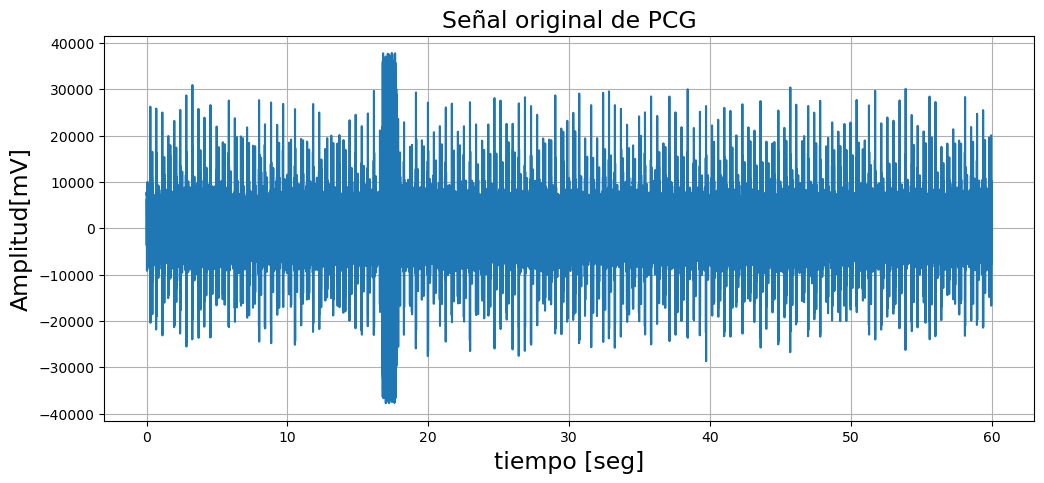

In [27]:
# Gráfica de la señal 
t = np.linspace(0,PCG.shape[0]/sr,PCG.shape[0]) # Eje de tiempo

plt.figure(figsize=(12,5))
plt.plot(t,PCG) 
plt.title('Señal original de PCG',fontsize=17)
plt.xlabel('tiempo [seg]',fontsize=17)
plt.ylabel('Amplitud[mV]',fontsize=17)
plt.grid(True)
# plt.savefig(os.path.join(savepath,'PCG.png'))

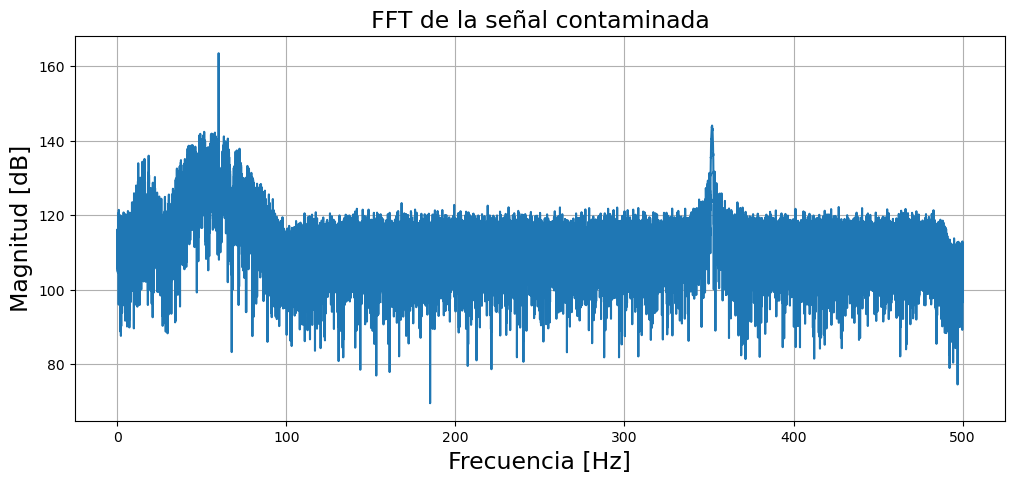

In [28]:
# FFT de la señal contaminada 
h,w = fou(PCG,sr)
plt.figure(figsize=(12,5))
plt.plot(w,h)
plt.title('FFT de la señal contaminada',fontsize=17)
plt.xlabel('Frecuencia [Hz]',fontsize=17)
plt.ylabel('Magnitud [dB]',fontsize=17)
plt.grid(True)
# plt.savefig(os.path.join(savepath,'FFT_PCG.png'))

#### Filtro Butterworth rechaza banda orden 2

In [29]:
# Diseño de filtro rechaza banda orden 2
n   = 2
fc  = 2*np.array( [58.0,62.0] )/sr
b,a = sg.butter(n,fc,btype = 'bandstop', output='ba')

In [31]:
print(b,a)

[ 0.98238544 -3.65388402  5.36233458 -3.65388402  0.98238544] [ 1.         -3.68635329  5.36202428 -3.62141475  0.96508117]


$$\text{H(z) = }\dfrac{0.982z^4 - 3.653z^3 + 5.362z^2 - 3.653z^1 + 0.982}{z^4 - 3.686z^3 + 5.362z^2 - 3.621z^1 + 0.965}$$

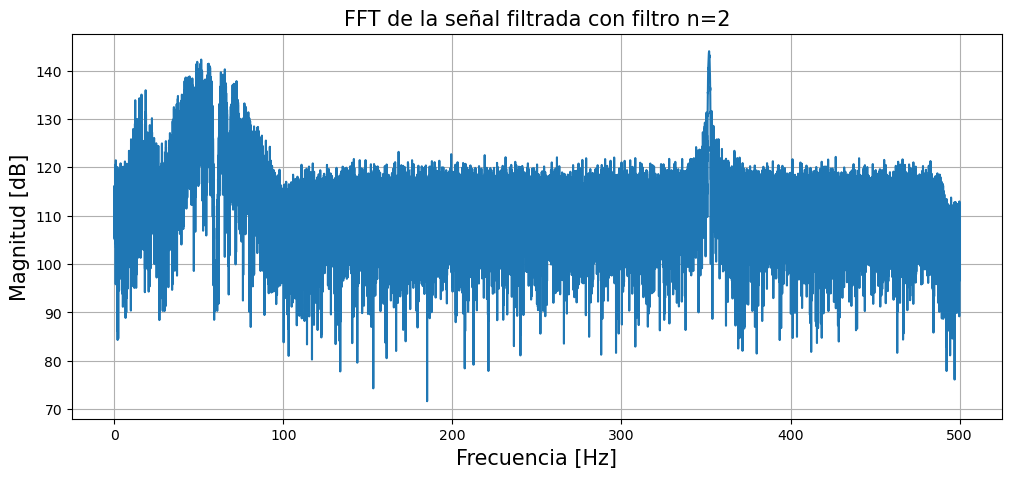

In [30]:
# Filtrado de la señal
PCG_2 = sg.lfilter(b,a,PCG)
PCG_2 = sg.lfilter(b,a,PCG_2[::-1])[::-1] #Implementación del filtro en fase cero

# FFT de señal filtrada 
h2,w2 = fou(PCG_2,sr)
plt.figure(figsize=(12,5))
plt.plot(w2,h2)
plt.title('FFT de la señal filtrada con filtro n=2',fontsize=15)
plt.xlabel('Frecuencia [Hz]',fontsize=15)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.grid(True)
# plt.savefig(os.path.join(savepath, 'FFT_PCG_BRB2.png'))

In [ ]:
# Audio de la señal filtrada
sd.play(PCG_2,sr)

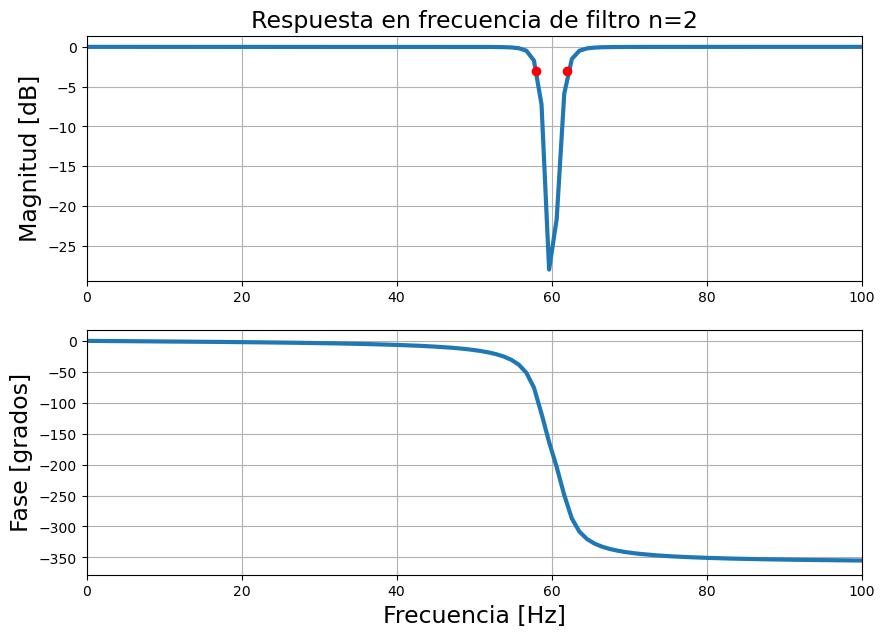

In [34]:
# Caracterización del filtro n=2
w,W,H = freqz_plot(b,a,sr)
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(w,H,linewidth=3)
fc1 = plt.plot(58,-3, 'ro') # Frecuencia de corte 1 en la gráfica de magnitud
fc2 = plt.plot(62,-3,'ro') # Frecuencia de corte 2 en la gráfica de magnitud
plt.xlim(0,100)
plt.title('Respuesta en frecuencia de filtro n=2',fontsize=17)
plt.ylabel('Magnitud [dB]',fontsize=17)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(w,W,linewidth=3)
plt.xlim(0,100)
plt.xlabel('Frecuencia [Hz]',fontsize=17)
plt.ylabel('Fase [grados]',fontsize=17)
plt.grid(True)
# plt.savefig(os.join.path(savepath, 'RF_RB2'))

#### Filtro Butterworth rechaza banda orden 4

In [35]:
"""Diseño de filtro orden 4"""
n   = 4
fc  = 2*np.array( [59.,61.] )/sr
b,a = sg.butter(n,fc,btype = 'bandstop', output='ba')

In [36]:
print(b,a)

[  0.98371517  -7.31722634  24.34541856 -47.2551875   58.48694256
 -47.2551875   24.34541856  -7.31722634   0.98371517] [  1.          -7.40782667  24.54573916 -47.44866117  58.48576033
 -47.06072752  24.146015    -7.22761231   0.96769554]


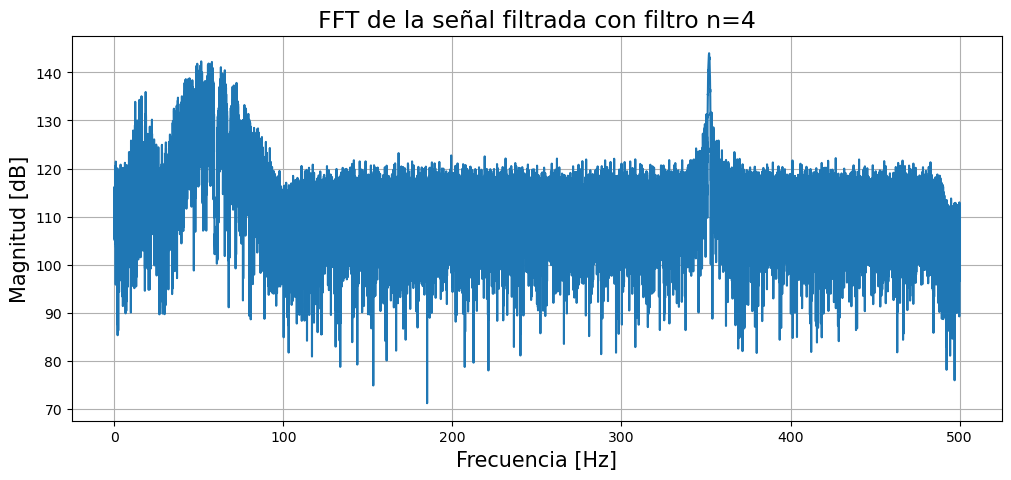

In [37]:
# Filtrado de la señal
PCG_4 = sg.lfilter(b,a,PCG)
PCG_4 = sg.lfilter(b,a,PCG_4[::-1])[::-1] #implementación del filtro en fase cero

# FFT de señal filtrada 
h4,w4 = fou(PCG_4,sr)
plt.figure(figsize=(12,5))
plt.plot(w4,h4)
plt.title('FFT de la señal filtrada con filtro n=4',fontsize=17)
plt.xlabel('Frecuencia [Hz]',fontsize=15)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.grid(True)
# plt.savefig(os.path.join(savepath, 'FFT_RB4.png'))

In [ ]:
"""Audio de señal filtrada"""
sd.play(PCG_4,sr)

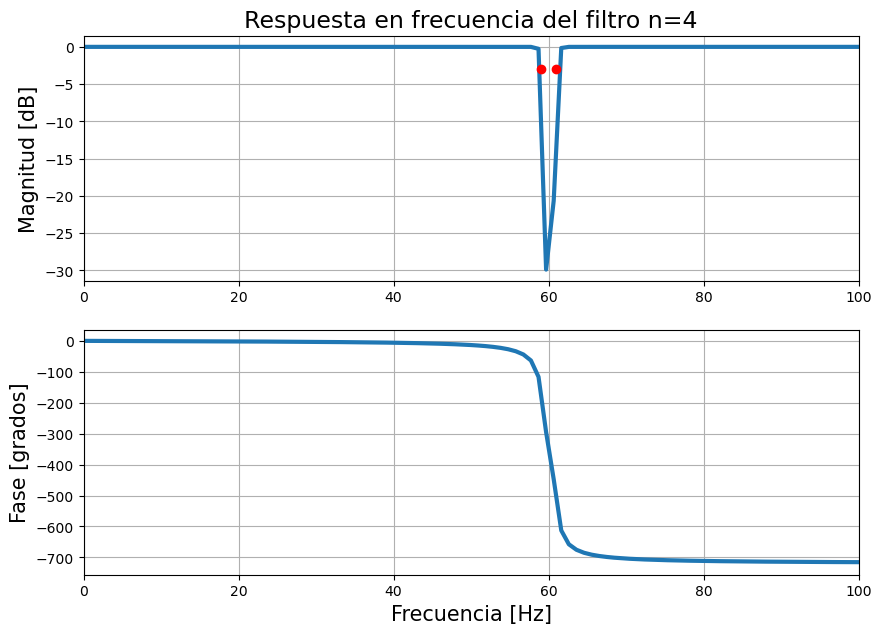

In [39]:
# Caracterización del filtro n=4
w,W,H = freqz_plot(b,a,sr)
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(w,H,linewidth=3)
fc1 = plt.plot(59,-3,'ro')
fc2 = plt.plot(61,-3,'ro')
plt.xlim(0,100)
plt.title('Respuesta en frecuencia del filtro n=4',fontsize=17)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(w,W,linewidth=3)
plt.xlim(0,100)
plt.xlabel('Frecuencia [Hz]',fontsize=15)
plt.ylabel('Fase [grados]',fontsize=15)
plt.grid(True)
# plt.savefig(os.path.join(savepath, 'RF_RB4.png'))

#### Filtro Chebyshev rechaza banda orden 4 tipo 1

In [40]:
# Diseño de filtro Chebyshev tipo 1 orden 4
n     = 4
fc1   = 2*np.array( [58,62] )/sr 
b1,a1 = sg.cheby1(n,2,fc1,btype='bandstop')

In [42]:
print(b1,a1)

[  0.76929933  -5.72266325  19.04085093 -36.95972544  45.74477495
 -36.95972544  19.04085093  -5.72266325   0.76929933] [  1.          -7.37843847  24.35252913 -46.89318236  57.58093193
 -46.15894498  23.59595255  -7.03732173   0.93884918]


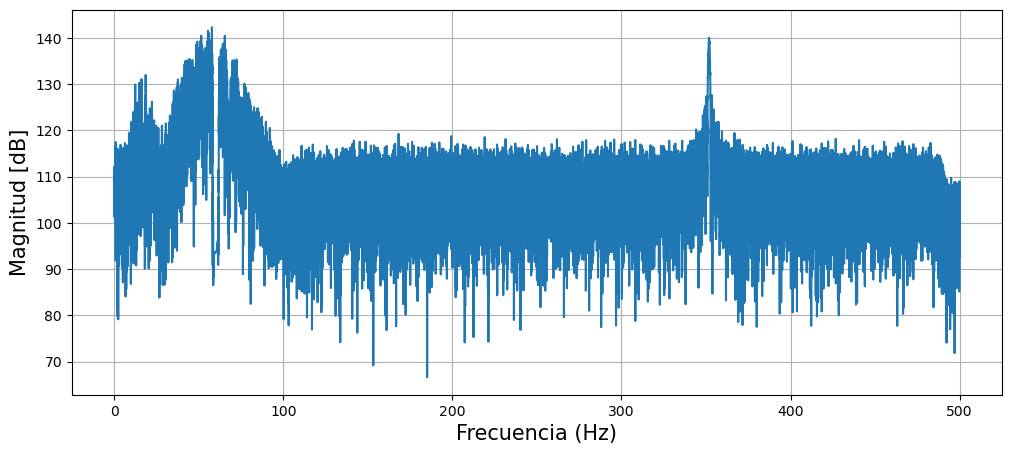

In [41]:
#Filtrado de la señal en fase cero 
PCG1 = sg.lfilter(b1,a1,PCG)
PCG1 = sg.lfilter(b1,a1,PCG1[::-1])[::-1]

#FFT de la señal filtrada 
h1,w1 = fou(PCG1,sr)
plt.figure(figsize=(12,5))
plt.plot(w1,h1)
plt.xlabel('Frecuencia (Hz)',fontsize=15)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.grid(True)
# plt.savefig(os.path.join(savepath, 'FFT_Cheby1PCG.png'))

In [ ]:
#Reproducir señal filtrada 
sd.play(PCG1,sr)

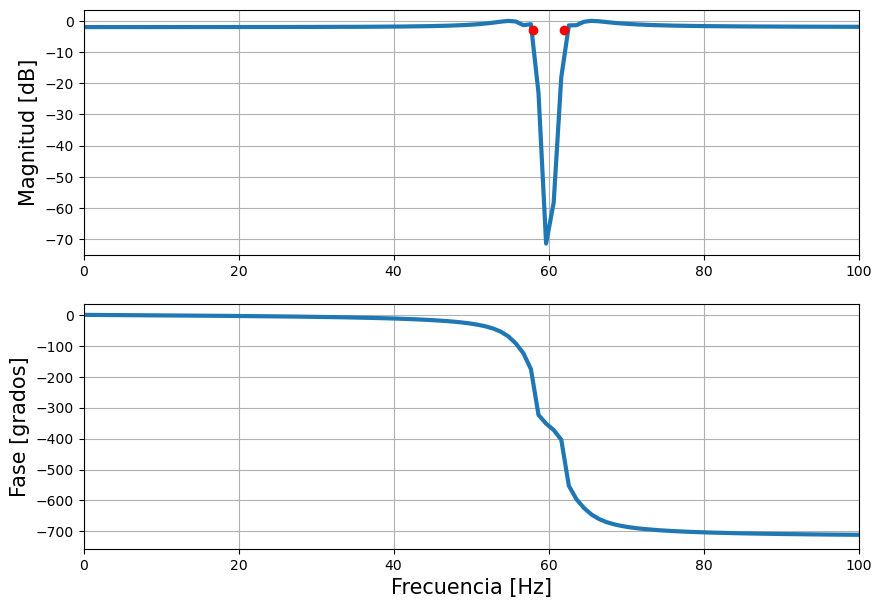

In [43]:
#Caracterización de filtros
w1,W1,H1 = freqz_plot(b1,a1,sr)

plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(w1,H1,linewidth=3)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.xlim(0,100)
fc1 = plt.plot(58,-3, 'ro') # Frecuencia de corte 1 en la gráfica de magnitud
fc2 = plt.plot(62,-3,'ro') # Frecuencia de corte 2 en la gráfica de magnitud
plt.xlim(0,100)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(w1,W1,linewidth=3)
plt.ylabel('Fase [grados]',fontsize=15)
plt.xlabel('Frecuencia [Hz]',fontsize=15)
plt.xlim(0,100)
plt.grid(True)
# plt.savefig(os.path.join(savepath, 'RF_Cheby1PCG.png'))

#### Filtro Chebyshev rechaza banda orden 4 tipo 2

In [44]:
# Diseño de filtro Chebyshev tipo 2 orden 4
fc2   = 2*np.array( [58.5,61.5] )/sr
b2,a2 = sg.cheby2(n,20,fc2,btype='bandstop')

In [45]:
print(b2,a2)

[  0.98000468  -7.28948249  24.2527398  -47.07484506  58.26354652
 -47.07484506  24.2527398   -7.28948249   0.98000468] [  1.          -7.40065408  24.49836063 -47.31180328  58.26176419
 -46.83639989  24.00850148  -7.17979785   0.96040918]


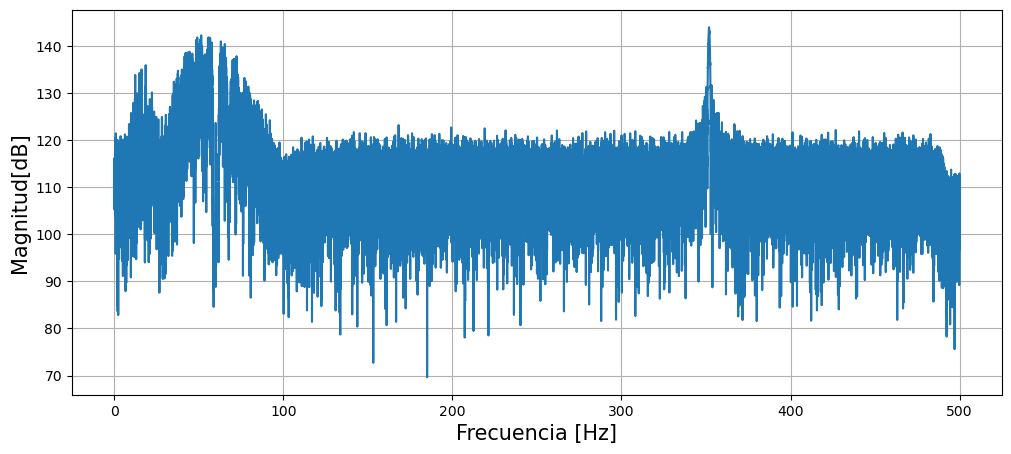

In [46]:
# Filtrado de la señal
PCG2 = sg.lfilter(b2,a2,PCG)
PCG2 = sg.lfilter(b2,a2,PCG2[::-1])[::-1]

# FFT de la señal filtrada 
H2,w2 = fou(PCG2,sr)

plt.figure(figsize=(12,5))
plt.plot(w2,H2)
plt.xlabel('Frecuencia [Hz]', fontsize=15)
plt.ylabel('Magnitud[dB]',fontsize=15)
plt.grid(True)
# plt.savefig(os.path.join(savepath, 'FFT_Cheby2PCG.png'))

In [ ]:
sd.play(PCG2,sr)

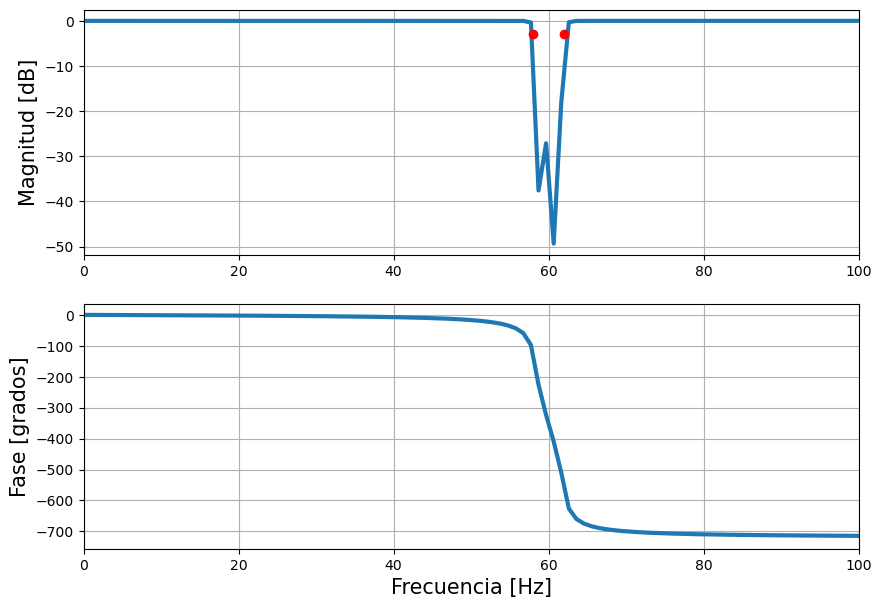

In [47]:
# Caracterización del filtro 
w2,W2,H2 = freqz_plot(b2,a2,sr)

plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(w2,H2,linewidth=3)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.xlim(0,100)
fc1 = plt.plot(58.,-3, 'ro') # Frecuencia de corte 1 en la gráfica de magnitud
fc2 = plt.plot(62.,-3,'ro') # Frecuencia de corte 2 en la gráfica de magnitud
plt.xlim(0,100)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(w2,W2,linewidth=3)
plt.ylabel('Fase [grados]',fontsize=15)
plt.xlabel('Frecuencia [Hz]',fontsize=15)
plt.xlim(0,100)
plt.grid(True)
# plt.savefig(os.path.join(savepath, 'RF_Cheby2PCG.png'))